# Flume testing

Flume test will confirm debris rack angling for the final design.

### Overall Hypothesis
Including a horizontal angle to the debris rack, increases the maximum vertical angle allowed for debris to pass.

### Method
1. Confirm the angle calculations using a known debris piece.
2. Test the angle of the debris rack with and without the horizontal angle for each angle.



In [65]:
# 1
from mech_module import *

debris_diameter = 0.006 # in m - diameter of debris
debris_rho = 600 # in kg/m^3
depth = 0.08 # in m

# record data
flat_angles = [70,70,65,60,60,50,30,35] # in degrees from horizontal
# 2
angled_angles = [80, 80,78,75,60,55,50, 55] # in degrees from horizontal
flow = [1.2,1.2,1.2,1.2,1.2,1.2,1.2, 1.2, ] # in L/s
height = [0.042,0.056,0.06,0.067,0.074,0.08,0.085, 0.083] # in m (0.08m = 8cm)

# calculate the velocities from the flow using L/s and height in flume
velocities = []
for i in range(len(flow)):
    velocities.append(flow[i]/(height[i]*depth*1000))

froude = []
for i in range(len(velocities)):
    froude.append(froude_number(velocities[i], height[i]))

# calculate the expected maximum angle for each velocity
exp_angles = []
for i in np.linspace(0, 3.5, 20):
    exp_angles.append(-debris_angle(i, debris_diameter, debris_rho))

print(froude_number(3.5, 1))

1.1174639994246767


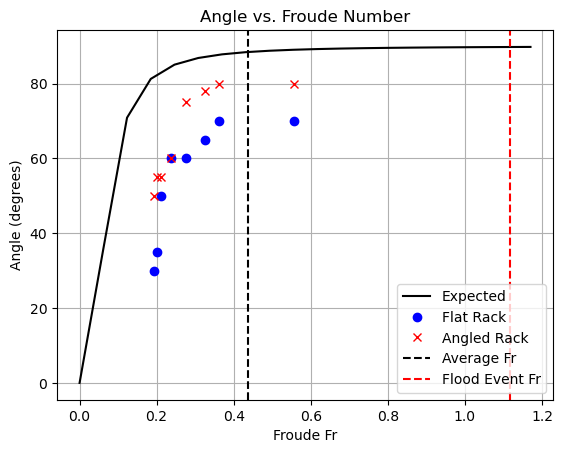

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# present data
# plot the velocity on the x-axis and the angle on the y-axis 
plt.figure()
plt.plot(np.linspace(0,1.17,20), exp_angles, '-', label='Expected', color='k')
plt.plot(froude, flat_angles, 'o', label='Flat Rack', color='b')
plt.plot(froude, angled_angles, 'x', label='Angled Rack', color='r')

# draw a line of best fir for the flat rack and the angled rack
# Calculate the line of best fit for flat_angles
flat_fit = np.polyfit(froude, flat_angles, 1)
flat_fit_fn = np.poly1d(flat_fit)

# Calculate the line of best fit for angled_angles
angled_fit = np.polyfit(froude, angled_angles, 1)
angled_fit_fn = np.poly1d(angled_fit)

# # Plot the line of best fit for flat_angles
# plt.plot(np.linspace(0.1, max(froude), 20), flat_fit_fn(np.linspace(0.1, max(froude), 20)), '-',color='b', label='Flat Rack Fit')

# # Plot the line of best fit for angled_angles
# plt.plot(np.linspace(0.1, max(froude), 20), angled_fit_fn(np.linspace(0.1, max(froude), 20)), '-', color='r', label='Angled Rack Fit')


plt.xlabel('Froude Fr')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs. Froude Number')

# plot a vertical dashed line at the average operating Froude number and the flood event Froude number
avg_froude = 0.437
flood_froude = 1.117
plt.axvline(x=avg_froude, color='k', linestyle='--', label='Average Fr')
plt.axvline(x=flood_froude, color='r', linestyle='--', label='Flood Event Fr')
plt.legend()
plt.grid()
plt.show()
